## 实验：图像伪彩色增强

### 实验概要

假设我们想在地图上显示不同地区的温度。我们可以把地图上的温度数据叠加为灰度图像 —— 较暗的区域代表较冷的温度，更明亮的区域代表较热的区域。这样做的原因主要有两个：首先，人类视觉系统没有被优化来测量灰度强度的微小变化,而对彩色的微小差别极为敏感。人眼一般能够区分的灰度级只有二十几个，而对不同亮度和色调的彩色图像分辨能力却可达到灰度分辨能力的百倍以上。第二，我们可以用不同的颜色代表不同的意义，譬如：用蓝色和较温暖的温度用红色表示较冷的温度更有意义。温度数据只是一个例子，但还有其他几个数据是单值（灰度）的情况，但将其转换为彩色数据以实现可视化是有意义的。用伪彩色更好地显示数据的其他例子是高度、压力、密度、湿度等等。通常，空间中的行星和其他物体的灰度图像就是采用伪彩色来显示细节，并对不同颜色的不同材质对应的区域进行标记。从而，帮助人类探索木星，金星和冥王星！

<img src="./img/colormap.jpg" width="60%">

由于人的生理视觉系统特性对微小的灰度变化不敏感，利用这个特性人们就可以把人眼不敏感的灰度信号，映射为对人眼敏感的彩色信号，以增强人对图像中细微变化的分辨力。彩色增强就是根据人的这个特点，将彩色用于图像增强之中，在图像处理技术中彩色增强的应用十分广泛且效果显著。常见的彩色增强技术主要有假彩色增强及伪彩色增强两大类。

1. 真彩色（true color）：自然物体的彩色叫做真彩色.
2. 假彩色（false color）增强：是将一幅彩色图像映射为另一幅彩色图像，从而达到增强彩色对比，使某些图像达到更加醒目的目的。
3. 伪彩色（pesudo color）增强：是把一幅黑白域图像的不同灰度级映射为一幅彩色图像的技术手段称做 **伪彩色增强**。

伪彩色增强的基本思想，就是将图像灰度分级，然后对每个灰度值区间内的像素赋一种颜色，从而使单色图像映射成彩色图像。我们可以在 OpenCV 中调用 `applyColorMap()` 函数，实现对灰度图像的伪彩色增强。

### 实验目标

在本实验中，我们将先给出一个简单的方法，使用 OpenCV 的预定义的颜色映射来将灰度图像伪彩色化；之后，我们还将展示如何通过自定义的调色板实现。

### 1. 导入 OpenCV

In [1]:
import cv2

# 加载matplotlib.pyplot进行图像显示
import matplotlib.pyplot as plt 

# 魔法指令，是图像直接嵌入Jupyter Notebook显示
%matplotlib inline

### 2. 加载并显示图像

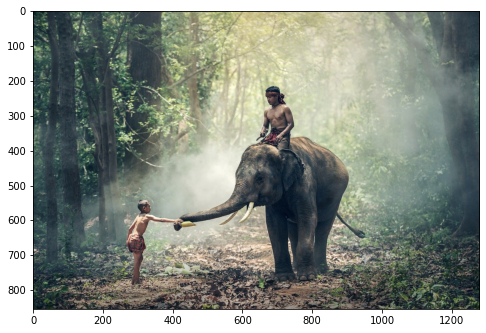

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab1/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

src = cv2.imread("./data/elephant.jpg")

# 设置画布尺寸
plt.figure(figsize=(8,10))                      
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

### 3. 将图像转换为灰度图片

使用 `cv2.cvtColor` 函数，设置 `cv2.COLOR_BGR2GRAY` 选项实现到灰度图片的转换。

<function matplotlib.pyplot.show(close=None, block=None)>

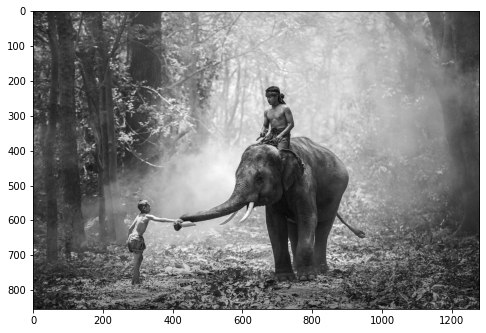

In [3]:
# 将图像转换为灰度图片
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)    

# 设置画布尺寸
plt.figure(figsize=(8,10))                      
plt.imshow(gray, cmap="gray")
plt.show

### 4. 对灰度图像实现为彩色增强

OpenCV 的定义各种 ColorMap（色度图），可以应用于灰度图像。调用函数 `applycolormap` 产生伪彩色图像，调用函数是需要制定你选取的色度图名称。我们随机调用几个色度图测试一下效果：

使用 `cv2.COLORMAP_AUTUMN` 色度图： 

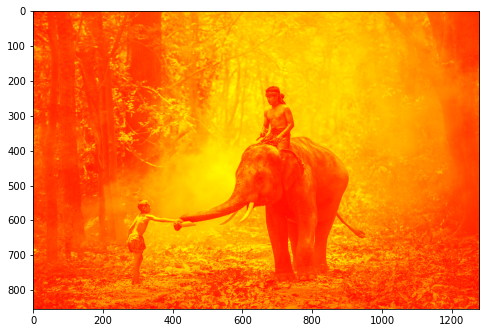

In [4]:
dst = cv2.applyColorMap(gray, cv2.COLORMAP_AUTUMN)

# 设置画布尺寸
plt.figure(figsize=(8,10))                      
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

使用 `cv2.COLORMAP_OCEAN` 色度图：

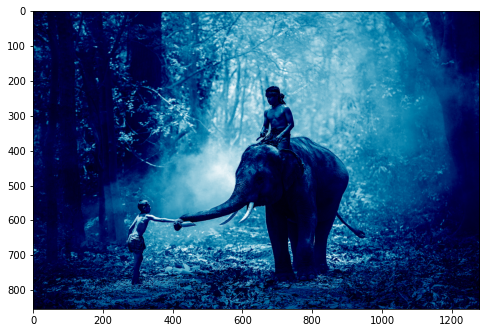

In [5]:
dst = cv2.applyColorMap(gray, cv2.COLORMAP_OCEAN)

# 设置画布尺寸
plt.figure(figsize=(8,10))                      
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

使用 `cv2.COLORMAP_TURBO` 色度图：

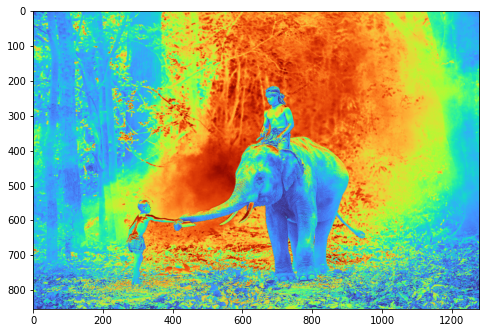

In [6]:
dst = cv2.applyColorMap(src, cv2.COLORMAP_TURBO)

# 设置画布尺寸
plt.figure(figsize=(8,10))                       
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

$\uparrow$ 以上的效果是不是觉得似曾相识？没错，这实际上是实现很多手机拍照 App 中照片滤镜功能的一个最简单的手段。

### 5. 自定义色度图

加入你对内置的色度图感觉不满意，你可以自定义一个色度图，并将图像映射到自己的色度图中执行彩色增强，步骤如下：

1. 定义颜色映射: 颜色映射是从 0-255 个值到 256 个颜色的映射。在 OpenCV 中，我们需要创建一个尺寸为 `256x1` 的八位彩色图像，来存储 256 个颜色值。
2. 使用查找表映射颜色：在 OpenCV 中，使用查找表 `LUT` 函数，将存储在 `256x1` 彩色图像中的颜色映射应用到图像。

`cv2.LUT(src, lut, dst=None)` 有三个参数，分别为：

- **src**：输入数据 array，类型为 8 位整型（np.uin8)
- **lut**：查找表，如果输入 src 是多通道的，例如：是 BGR 三通到的图像，而查表是单通道的，则此时 B、G、R 三个通道使用的是同一个查找表
- **dst=None**：输出数组，大小和通道数与 src 相同，而深度 depth 与 lut 相同

下面，我们设置一个三通道的 `256x1` 的八位色度图，直接将色度图映射到彩色图像上：

In [7]:
import numpy as np

def applyCustomColorMap(im_gray) :

    lut = np.zeros((256, 1, 3), dtype=np.uint8)

    lut[:, 0, 0] = [255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,253,
                    251,249,247,245,242,241,238,237,235,233,231,
                    229,227,225,223,221,219,217,215,213,211,209,
                    207,205,203,201,199,197,195,193,191,189,187,
                    185,183,181,179,177,175,173,171,169,167,165,
                    163,161,159,157,155,153,151,149,147,145,143,
                    141,138,136,134,132,131,129,126,125,122,121,
                    118,116,115,113,111,109,107,105,102,100,98,97,
                    94,93,91,89,87,84,83,81,79,77,75,73,70,68,
                    66,64,63,61,59,57,54,52,51,49,47,44,42,40,39,
                    37,34,33,31,29,27,25,22,20,18,17,14,13,11,9,
                    6,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    lut[:, 0, 1] = [ 255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,255,255,255,255,
                    255,255,255,255,255,255,255,254,252,250,248,
                    246,244,242,240,238,236,234,232,230,228,226,
                    224,222,220,218,216,214,212,210,208,206,204,
                    202,200,198,196,194,192,190,188,186,184,182,
                    180,178,176,174,171,169,167,165,163,161,159,
                    157,155,153,151,149,147,145,143,141,139,137,
                    135,133,131,129,127,125,123,121,119,117,115,
                    113,111,109,107,105,103,101,99,97,95,93,91,89,
                    87,85,83,82,80,78,76,74,72,70,68,66,64,62,
                    60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,
                    30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,0 ]

    
    lut[:, 0, 2] = [195,194,193,191,190,189,188,187,186,185,184,
                    183,182,181,179,178,177,176,175,174,173,172,
                    171,170,169,167,166,165,164,163,162,161,160,
                    159,158,157,155,154,153,152,151,150,149,148,
                    147,146,145,143,142,141,140,139,138,137,136,
                    135,134,133,131,130,129,128,127,126,125,125,
                    125,125,125,125,125,125,125,125,125,125,125,
                    126,126,126,126,126,126,126,126,126,126,126,
                    126,126,126,126,126,126,126,126,126,126,126,
                    126,126,126,126,126,126,126,126,126,126,126,
                    126,126,126,126,126,126,126,126,126,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,127,127,127,127,127,127,127,127,127,
                    127,127,126,126,126,126,126,126,126,126,126,
                    126,126,126,126,126,126,126,126,126,126,126,
                    126,126,126,126,126,126,126,126,126,126,126,
                    126,126,126,126,126,126,126,126,126,126,126,
                    126,126,126]

    im_color = cv2.LUT(im_gray, lut)   
    return im_color;

### 6. 映射至自定义色度图

<function matplotlib.pyplot.show(close=None, block=None)>

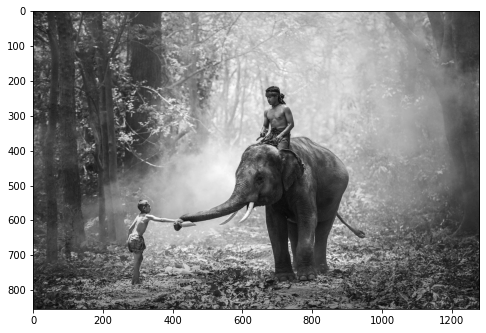

In [8]:
# 重新读取源文件，直接以灰度模式读取
gray_custom = cv2.imread("./data/elephant.jpg", cv2.IMREAD_GRAYSCALE); 
# 设置画布尺寸
plt.figure(figsize=(8,10))                                             
plt.imshow(gray_custom, cmap="gray")
plt.show

调用 `applyCustomColorMap` 函数，将三通道图像与自定义色度图执行映射：

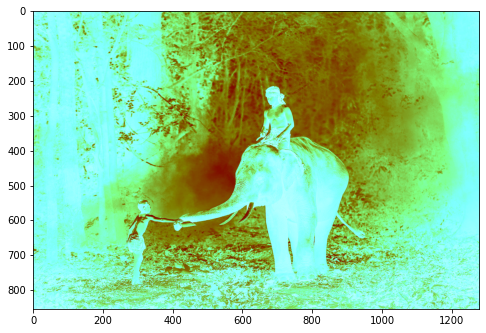

In [9]:
# 转换为BGR三通道图像
gray_custom = cv2.cvtColor(gray_custom, cv2.COLOR_GRAY2BGR);            
# 映射至自定义色度图
im_color = applyCustomColorMap(gray_custom);                            
    
# 设置画布尺寸
plt.figure(figsize=(8,10))                            
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB)) 
plt.show;

### 实验小结

在本实验中，你首先使用 OpenCV 的预定义的颜色映射来将灰度图像伪彩色化；之后，通过自定义的调色板实现对彩色图像的。OpenCV 内置的 ColorMap 实际上已经能满足大部分的图像处理需求，完整的 [ColormapTypes 参数](https://docs.opencv.org/4.2.0/d3/d50/group__imgproc__colormap.html#ga9a805d8262bcbe273f16be9ea2055a65) 请查阅官方文档。

#### <font color="#0000dd">练习题</font>

> - **<font color="#0000dd">尝试采用更多的 ColorMap 对实验图像进行映射增强，进一步熟悉各种色度图的实现效果。</font>**